# PySpark Indian Flights Analysis


In [10]:
# Importing PySpark library for distributed data processing
import pyspark as sp
# Creating a SparkContext to initialize Spark
sc = sp.SparkContext.getOrCreate()
# Displaying the SparkContext information
print("SparkContext:", sc)
# Printing the Spark version for reference
print("Spark Version:", sc.version)

SparkContext: <SparkContext master=local[*] appName=pyspark-shell>
Spark Version: 3.5.0


In [11]:
# Importing the SparkSession module from PySpark for working with structured data
from pyspark.sql import SparkSession

# Creating or getting an existing Spark session
spark = SparkSession.builder.getOrCreate()

# Displaying the SparkSession information
print("SparkSession:", spark)

SparkSession: <pyspark.sql.session.SparkSession object at 0x7f70cd799db0>


In [12]:
# Importing necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Generating a Pandas DataFrame with random data
pd_temp = pd.DataFrame(np.random.random(10))

# Converting the Pandas DataFrame to a PySpark DataFrame
spark_temp = spark.createDataFrame(pd_temp)

# Displaying the list of tables in the Spark catalog before and after creating a temporary view
print("Tables in Spark Catalog before creating temporary view:", spark.catalog.listTables())

# Creating a temporary view named "temp" for the PySpark DataFrame
spark_temp.createOrReplaceTempView("temp")

# Displaying the list of tables in the Spark catalog after creating a temporary view
print("Tables in Spark Catalog after creating temporary view:", spark.catalog.listTables())


Tables in Spark Catalog before creating temporary view: [Table(name='temp', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]


Tables in Spark Catalog after creating temporary view: [Table(name='temp', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]


In [13]:
# Defining the file path for the Indian flights data
file_path = './data/Flight_Schedule.csv'

# Reading the data from the CSV file into a PySpark DataFrame
flights = spark.read.csv(file_path, header=True)

# Displaying a preview of the loaded data
flights.show()


+-------+------------+---------+-----------+--------------------+----------------------+--------------------+----------+----------+----------+-----------+
|airline|flightNumber|   origin|destination|          daysOfWeek|scheduledDepartureTime|scheduledArrivalTime|  timezone| validFrom|   validTo|lastUpdated|
+-------+------------+---------+-----------+--------------------+----------------------+--------------------+----------+----------+----------+-----------+
|  GoAir|         425|    Delhi|  Hyderabad|Sunday,Monday,Tue...|                 05:45|                  NA|2019-03-30|2018-10-28|2019-03-30| 2023-11-05|
|  GoAir|         423|    Delhi|  Hyderabad|            Saturday|                 07:30|                  NA|2018-10-28|2018-10-28|2018-10-28| 2023-11-05|
|  GoAir|         423|    Delhi|  Hyderabad|              Friday|                 07:30|                  NA|2018-12-01|2018-11-03|2018-12-01| 2023-11-05|
|  GoAir|         423|    Delhi|  Hyderabad|              Friday|     

In [14]:
# Checking the data type of the 'flights' DataFrame
type(flights)

pyspark.sql.dataframe.DataFrame

In [15]:
# Displaying the list of available databases in the Spark catalog
spark.catalog.listDatabases()

[Database(name='default', catalog='spark_catalog', description='default database', locationUri='file:/mnt/d/TST14/pyspark-indian-flights-analysis/spark-warehouse')]

In [16]:
# Displaying the list of tables in the Spark catalog
spark.catalog.listTables()

[Table(name='temp', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]

In [17]:
# Creating a temporary view named 'flights' for the flight schedule DataFrame
flights.name = flights.createOrReplaceTempView('flights')

# Displaying the list of tables in the Spark catalog after creating a temporary view
spark.catalog.listTables()

[Table(name='flights', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='temp', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]

In [18]:
# Retrieving the flight schedule DataFrame from the temporary view 'flights'
flights_df = spark.table('flights')

# Displaying the first few rows of the flight schedule DataFrame
print(flights_df.show())

+-------+------------+---------+-----------+--------------------+----------------------+--------------------+----------+----------+----------+-----------+
|airline|flightNumber|   origin|destination|          daysOfWeek|scheduledDepartureTime|scheduledArrivalTime|  timezone| validFrom|   validTo|lastUpdated|
+-------+------------+---------+-----------+--------------------+----------------------+--------------------+----------+----------+----------+-----------+
|  GoAir|         425|    Delhi|  Hyderabad|Sunday,Monday,Tue...|                 05:45|                  NA|2019-03-30|2018-10-28|2019-03-30| 2023-11-05|
|  GoAir|         423|    Delhi|  Hyderabad|            Saturday|                 07:30|                  NA|2018-10-28|2018-10-28|2018-10-28| 2023-11-05|
|  GoAir|         423|    Delhi|  Hyderabad|              Friday|                 07:30|                  NA|2018-12-01|2018-11-03|2018-12-01| 2023-11-05|
|  GoAir|         423|    Delhi|  Hyderabad|              Friday|     

# 1. Flight Counts by Airline:

In [19]:
# Clean data for Airline Counts analysis
# Replace 'NA' strings with actual None values for Airline Counts analysis
airline_counts_data = flights_df.na.replace('NA', None, subset=['airline']).na.drop(subset=['airline'])

# Perform the Flight Counts by Airline analysis
airline_counts = airline_counts_data.groupBy('airline').count().orderBy('count', ascending=False)


In [20]:
airline_counts.show()

+--------------------+-----+
|             airline|count|
+--------------------+-----+
|              IndiGo|41291|
|               GoAir|11666|
|            SpiceJet|10824|
|           Air India| 8185|
|       AirAsia India| 5227|
|             Vistara| 4332|
|Alliance Air (India)| 3069|
|         Jet Airways| 1307|
|              TruJet| 1141|
|            Star Air|  472|
|           Akasa Air|  438|
|              FlyBig|  214|
|             Jetlite|  117|
|        IndiaOne Air|   24|
+--------------------+-----+



# 2. Flight Counts by Origin-Destination Pair:

In [21]:
# Clean data for Origin-Destination Counts analysis
origin_dest_counts_data = flights_df.na.replace('NA', None, subset=['origin', 'destination']).na.drop(subset=['origin', 'destination'])
origin_dest_counts = airline_counts_data.groupBy('origin', 'destination').count().orderBy('count', ascending=False)
origin_dest_counts.show()


+---------+-----------+-----+
|   origin|destination|count|
+---------+-----------+-----+
|   Mumbai|      Delhi| 1339|
|    Delhi|     Mumbai| 1297|
|Bengaluru|      Delhi| 1018|
| Srinagar|      Delhi|  973|
|    Delhi|  Bengaluru|  924|
|    Delhi|   Srinagar|  913|
|    Delhi|    Kolkata|  802|
|  Kolkata|      Delhi|  784|
|   Mumbai|  Bengaluru|  768|
|Bengaluru|     Mumbai|  737|
|Bengaluru|  Hyderabad|  649|
|  Kolkata|  Bengaluru|  607|
|Ahmedabad|      Delhi|  605|
|     Pune|      Delhi|  594|
|    Delhi|       Pune|  593|
|Hyderabad|  Bengaluru|  557|
|    Delhi|  Hyderabad|  542|
|    Delhi|  Ahmedabad|  539|
|Bengaluru|    Kolkata|  537|
|Hyderabad|      Delhi|  534|
+---------+-----------+-----+
only showing top 20 rows



# 3. Average Departure and Arrival Times:

In [22]:
from pyspark.sql.functions import avg,col, unix_timestamp, from_unixtime

In [23]:
# Replace 'NA' with None and drop null values
avg_times_data = flights_df.na.replace('NA', None, subset=['scheduledDepartureTime', 'scheduledArrivalTime']).na.drop(subset=['scheduledDepartureTime', 'scheduledArrivalTime'])

In [24]:
# Convert 'scheduledDepartureTime' to seconds since midnight and filter out null values
avg_times_data = avg_times_data.withColumn('scheduledDepartureTime', unix_timestamp(col('scheduledDepartureTime'), 'HH:mm').cast('int'))
avg_times_data = avg_times_data.filter(avg_times_data['scheduledDepartureTime'].isNotNull())

# Convert 'scheduledArrivalTime' to seconds since midnight and filter out null values
avg_times_data = avg_times_data.withColumn('scheduledArrivalTime', unix_timestamp(col('scheduledArrivalTime'), 'HH:mm').cast('int'))
avg_times_data = avg_times_data.filter(avg_times_data['scheduledArrivalTime'].isNotNull())

In [25]:
# Calculate average departure and arrival times grouped by origin
avg_departure_time = avg_times_data.groupBy('origin').agg(avg('scheduledDepartureTime').alias('avg_departure_time'))
avg_arrival_time = avg_times_data.groupBy('origin').agg(avg('scheduledArrivalTime').alias('avg_arrival_time'))

# Convert average departure and arrival times back to 'HH:mm' format
avg_departure_time = avg_departure_time.withColumn('avg_departure_time', from_unixtime('avg_departure_time', 'HH:mm'))
avg_arrival_time = avg_arrival_time.withColumn('avg_arrival_time', from_unixtime('avg_arrival_time', 'HH:mm'))

In [26]:
# Join the results on the 'origin' column
result = avg_departure_time.join(avg_arrival_time, on='origin')

# Show the results
result.show()

+--------------+------------------+----------------+
|        origin|avg_departure_time|avg_arrival_time|
+--------------+------------------+----------------+
|       Udaipur|             14:48|           16:22|
|       Dimapur|             12:26|           13:48|
|         Kochi|             12:44|           13:54|
|    Aurangabad|             14:58|           16:28|
|   Bhubaneswar|             13:46|           15:21|
|        Aizwal|             13:22|           14:24|
|        Mysore|             15:10|           16:29|
|         MIHAN|             12:32|           13:56|
|         Jammu|             14:17|           15:28|
|       Jalgaon|             14:59|           16:21|
|      Agartala|             14:28|           15:37|
|          Bhuj|             12:12|           13:47|
|     Darbhanga|             13:47|           15:58|
|         Hubli|             13:56|           15:19|
|         Patna|             14:23|           16:05|
|Shirdi Airport|             13:57|           

# 4. Busiest Day of the Week:

In [27]:
from pyspark.sql.functions import explode, split

In [28]:
# Clean data for Busiest Day of the Week analysis
day_counts_data = flights_df.na.replace('NA', None, subset=['daysOfWeek']).na.drop(subset=['daysOfWeek'])


In [29]:
day_counts = (
    day_counts_data
    .select('daysOfWeek')
    .withColumn('day', explode(split('daysOfWeek', ',')))
    .groupBy('day')
    .count()
    .orderBy('count', ascending=False)
)

In [30]:
day_counts.show()

+---------+-----+
|      day|count|
+---------+-----+
| Saturday|61171|
|   Friday|59906|
|  Tuesday|58477|
| Thursday|58327|
|   Monday|57993|
|Wednesday|57902|
|   Sunday|57691|
+---------+-----+



# 5. Busiest Airports and Airlines

In [31]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, col
import matplotlib.pyplot as plt

In [32]:
# Identify busiest airports by counting the number of departures and arrivals
busiest_airports = flights_df.groupBy("origin").agg(count("*").alias("total_flights")).orderBy("total_flights", ascending=False)

In [33]:
busiest_airports.show()

+-----------+-------------+
|     origin|total_flights|
+-----------+-------------+
|      Delhi|        13332|
|  Bengaluru|         8941|
|     Mumbai|         8301|
|    Kolkata|         6120|
|  Hyderabad|         5678|
|    Chennai|         4824|
|  Ahmedabad|         3560|
|       Pune|         2726|
|        Goa|         2251|
|   Srinagar|         1897|
|     Jaipur|         1615|
|    Lucknow|         1507|
|   Guwahati|         1430|
| Chandigarh|         1421|
|      Kochi|         1258|
|      Patna|         1187|
| Port Blair|         1090|
|Bhubaneswar|         1085|
|     Indore|         1022|
|      MIHAN|          967|
+-----------+-------------+
only showing top 20 rows



<Figure size 1200x600 with 0 Axes>

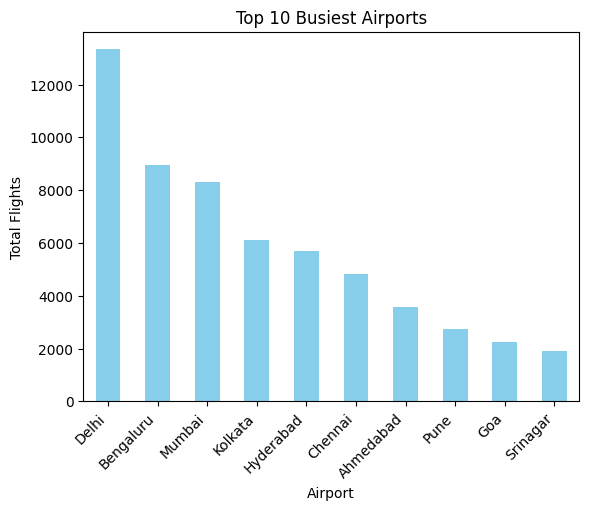

In [34]:
# Plotting TOP !0 busiest airports

busiest_airports_plot = busiest_airports.toPandas()
# Sorting the DataFrame by total_flights in descending order
busiest_airports_plot = busiest_airports_plot.sort_values(by='total_flights', ascending=False)

# Selecting only the top 10 busiest airports
top_10_airports = busiest_airports_plot.head(10)

# Plotting the top 10 busiest airports
plt.figure(figsize=(12, 6))
top_10_airports.plot(kind='bar', x='origin', y='total_flights', color='skyblue', legend=False)
plt.title('Top 10 Busiest Airports')
plt.xlabel('Airport')
plt.ylabel('Total Flights')
plt.xticks(rotation=45, ha='right')
plt.show()


In [35]:
# Identify busiest airlines by counting the number of flights operated
# Filter out rows where airline is 'NA'
busiest_airlines = flights.filter(col("airline") != 'NA') \
                          .groupBy("airline") \
                          .agg(count("*").alias("total_flights")) \
                          .orderBy("total_flights", ascending=False)

In [36]:
busiest_airlines.show()

+--------------------+-------------+
|             airline|total_flights|
+--------------------+-------------+
|              IndiGo|        41291|
|               GoAir|        11666|
|            SpiceJet|        10824|
|           Air India|         8185|
|       AirAsia India|         5227|
|             Vistara|         4332|
|Alliance Air (India)|         3069|
|         Jet Airways|         1307|
|              TruJet|         1141|
|            Star Air|          472|
|           Akasa Air|          438|
|              FlyBig|          214|
|             Jetlite|          117|
|        IndiaOne Air|           24|
+--------------------+-------------+



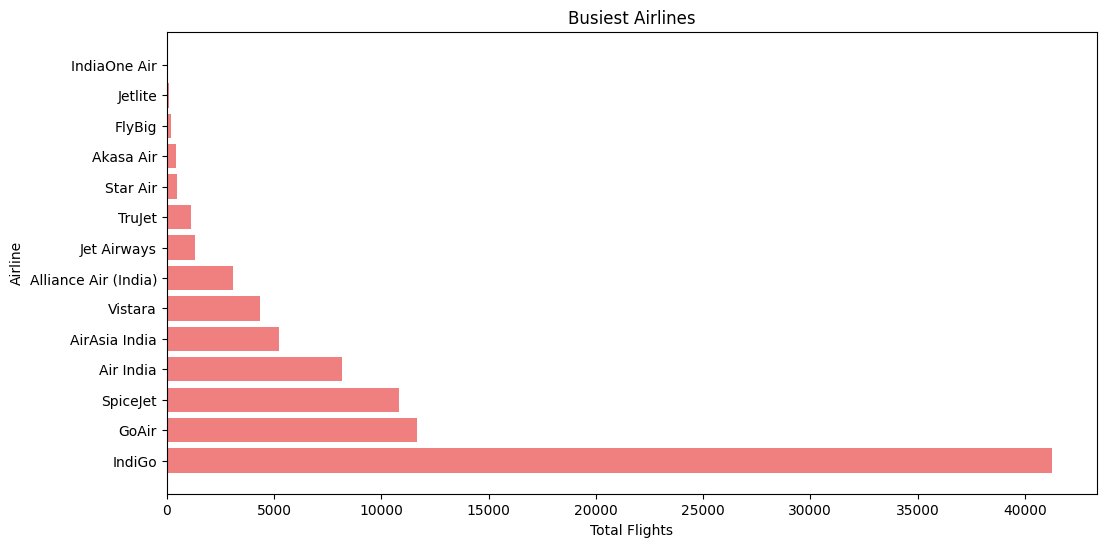

In [37]:
# Plotting busiest airlines
busiest_airlines_plot = busiest_airlines.toPandas()
# Sorting the DataFrame by total_flights in descending order
busiest_airlines_plot = busiest_airlines_plot.sort_values(by='total_flights', ascending=False)

# Plotting busiest airlines as a horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(busiest_airlines_plot['airline'], busiest_airlines_plot['total_flights'], color='lightcoral')
plt.title('Busiest Airlines')
plt.xlabel('Total Flights')
plt.ylabel('Airline')
plt.show()



# 6. Air Traffic Plots for Indian Airports

In [38]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import unix_timestamp, col, hour
from datetime import datetime

In [39]:
flights_df.show()

+-------+------------+---------+-----------+--------------------+----------------------+--------------------+----------+----------+----------+-----------+
|airline|flightNumber|   origin|destination|          daysOfWeek|scheduledDepartureTime|scheduledArrivalTime|  timezone| validFrom|   validTo|lastUpdated|
+-------+------------+---------+-----------+--------------------+----------------------+--------------------+----------+----------+----------+-----------+
|  GoAir|         425|    Delhi|  Hyderabad|Sunday,Monday,Tue...|                 05:45|                  NA|2019-03-30|2018-10-28|2019-03-30| 2023-11-05|
|  GoAir|         423|    Delhi|  Hyderabad|            Saturday|                 07:30|                  NA|2018-10-28|2018-10-28|2018-10-28| 2023-11-05|
|  GoAir|         423|    Delhi|  Hyderabad|              Friday|                 07:30|                  NA|2018-12-01|2018-11-03|2018-12-01| 2023-11-05|
|  GoAir|         423|    Delhi|  Hyderabad|              Friday|     

In [40]:
# Replace 'NA' with None and drop null values
flights_df_cleaned_times = flights_df.na.replace('NA', None, subset=['scheduledDepartureTime', 'scheduledArrivalTime']).na.drop(subset=['scheduledDepartureTime', 'scheduledArrivalTime'])

In [41]:
# Convert 'scheduledDepartureTime' and 'scheduledArrivalTime' to seconds since midnight and filter out null values
flights_df_cleaned_times = flights_df_cleaned_times.withColumn('scheduledDepartureTime', unix_timestamp(col('scheduledDepartureTime'), 'HH:mm').cast('int'))
flights_df_cleaned_times = flights_df_cleaned_times.filter(flights_df_cleaned_times['scheduledDepartureTime'].isNotNull())
flights_df_cleaned_times = flights_df_cleaned_times.withColumn('scheduledArrivalTime', unix_timestamp(col('scheduledArrivalTime'), 'HH:mm').cast('int'))
flights_df_cleaned_times = flights_df_cleaned_times.filter(flights_df_cleaned_times['scheduledArrivalTime'].isNotNull())

In [42]:
# Extract the hour of scheduled departure and arrival
flights_df_cleaned_times = flights_df_cleaned_times.withColumn('departureHour', hour(from_unixtime('scheduledDepartureTime')))
flights_df_cleaned_times = flights_df_cleaned_times.withColumn('arrivalHour', hour(from_unixtime('scheduledArrivalTime')))

In [43]:
# Plotting the data
departure_data = flights_df_cleaned_times.groupBy('departureHour').count().orderBy('departureHour').toPandas()
arrival_data = flights_df_cleaned_times.groupBy('arrivalHour').count().orderBy('arrivalHour').toPandas()

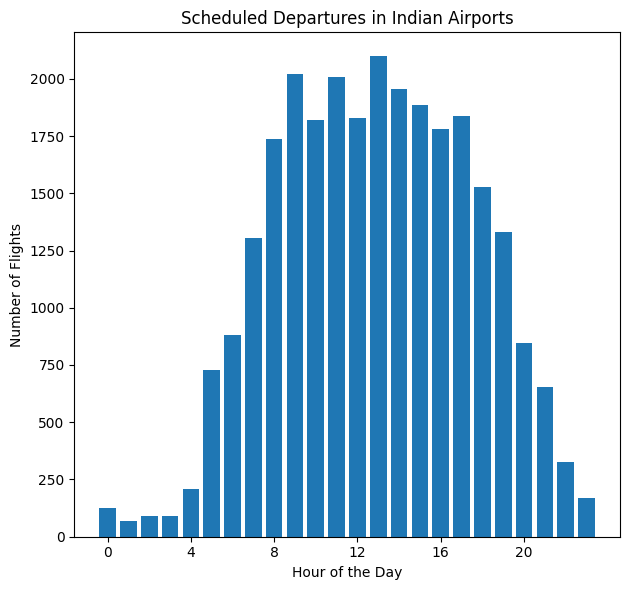

In [44]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(departure_data['departureHour'], departure_data['count'])
plt.title('Scheduled Departures in Indian Airports')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Flights')
plt.xticks(range(0, 24, 4))
plt.tight_layout()
plt.show()


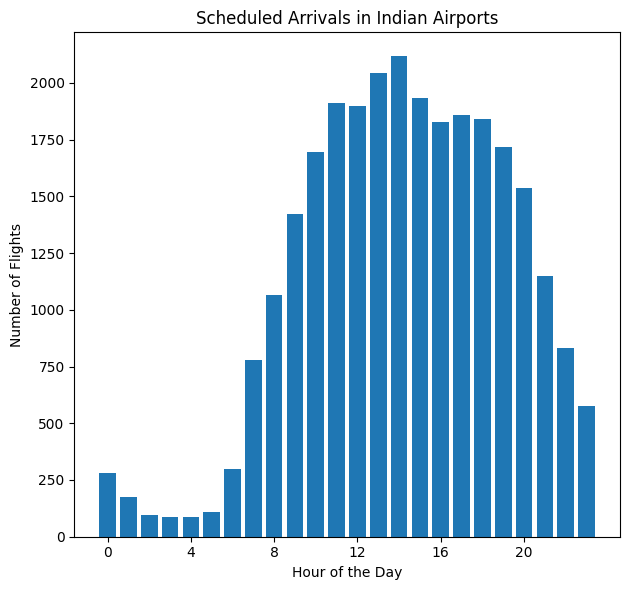

In [45]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.bar(arrival_data['arrivalHour'], arrival_data['count'])
plt.title('Scheduled Arrivals in Indian Airports')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Flights')
plt.xticks(range(0, 24, 4))
plt.tight_layout()
plt.show()